Observation météorologique historiques France (SYNOP)
https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/information/?sort=date

Ici nous utilisons les données de l'aéroport Lille-Lesquin (LYS)
La description json peut être récupérée sur la page dans la section "Modèle de données".


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import random

import tensorflow as tf
from tensorflow import keras

In [ ]:
# I runned in google colab.
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#### get dataset files

In [ ]:
dataset_filename = "data/donnees-synop-essentielles-omm (LYS).csv"
description_filename = "data/description-donnees-synop-essentielles-omm(LYS).json"

#### Read dataset **description**

In [ ]:
# load the column names abreviations from the json data description
with open(description_filename, 'r') as json_file:
    schema = json.load(json_file)

synop_codes=list( schema['definitions']['donnees-synop-essentielles-omm_records']['properties']['fields']['properties'].keys() )

#### Change dataset columns

In [ ]:
df = pd.read_csv(dataset_filename, sep=";")

synop_desc = list(df.columns)
code2desc = dict(zip(synop_codes, synop_desc))
columns_na = df.isna().sum().tolist()
df.columns  = synop_codes

df_desc=pd.DataFrame({'Code':synop_codes, 'Description':synop_desc, 'Na':columns_na})

<ipython-input-6-88326cf9a84e>:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_filename, sep=";")


In [ ]:
display(df_desc.style.set_properties(**{'text-align': 'left'}))

,Code,Description,Na
0,numer_sta,ID OMM station,0
1,date,Date,0
2,pmer,Pression au niveau mer,5
3,tend,Variation de pression en 3 heures,24
4,cod_tend,Type de tendance barométrique,17
5,dd,Direction du vent moyen 10 mn,8
6,ff,Vitesse du vent moyen 10 mn,6
7,t,Température,0
8,td,Point de rosée,0
9,u,Humidité,0


### Prepare dateset

In [ ]:
columns_used=['date','pmer','tend','cod_tend','dd','ff','td','u','ww','pres','rafper','per','rr1','rr3','tc']

to_drop = df.columns.difference(columns_used)
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.head(20)

,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,per,rr1,rr3,tc
0,2013-03-30T18:00:00+03:00,100950.0,60.0,1.0,50.0,5.1,267.05,50,2.0,100370.0,10.8,-10.0,0.0,0.0,3.4
1,2013-03-31T12:00:00+03:00,101460.0,70.0,2.0,50.0,4.6,267.65,60,2.0,100870.0,7.2,-10.0,0.0,0.0,1.4
2,2013-03-04T21:00:00+03:00,101130.0,-70.0,5.0,170.0,3.1,275.65,66,2.0,100560.0,4.1,-10.0,0.0,0.0,8.5
3,2012-01-10T03:00:00+03:00,103280.0,60.0,2.0,270.0,2.6,280.55,92,2.0,102700.0,3.6,-10.0,0.0,0.0,8.6
4,2012-01-13T12:00:00+03:00,103110.0,100.0,3.0,280.0,3.1,275.15,96,2.0,102510.0,3.6,-10.0,0.0,0.0,2.6
5,2012-01-16T06:00:00+03:00,102430.0,-30.0,6.0,70.0,3.6,269.75,78,0.0,101830.0,5.1,-10.0,0.0,0.0,-0.5
6,2012-01-17T21:00:00+03:00,103010.0,40.0,3.0,180.0,2.6,270.15,79,2.0,102410.0,3.6,-10.0,0.0,0.0,-0.1
7,2012-01-18T18:00:00+03:00,102670.0,-130.0,5.0,210.0,5.7,275.55,93,50.0,102080.0,12.3,-10.0,0.0,0.2,3.4
8,2012-01-28T00:00:00+03:00,102300.0,20.0,1.0,180.0,3.1,275.15,89,1.0,101710.0,6.2,-10.0,0.0,0.0,3.6
9,2012-02-19T06:00:00+03:00,101510.0,200.0,2.0,300.0,4.6,272.75,87,0.0,100920.0,7.2,-10.0,0.0,0.0,1.5


In [ ]:
display(df.describe().style.format('{:.3f}'))

,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,per,rr1,rr3,tc
count,34472.000,34453.000,34460.000,34469.000,34471.000,34477.000,34477.000,34451.000,34472.000,34460.000,34471.000,34340.000,34307.000,34477.000
mean,101626.234,-0.022,4.319,184.050,4.159,280.467,77.241,7.500,101057.532,7.242,-10.000,0.078,0.244,11.657
std,981.915,129.980,2.697,96.599,2.446,5.399,16.880,17.601,975.606,4.017,0.000,0.472,1.118,6.880
min,97180.000,-1200.000,0.000,0.000,0.000,255.550,14.000,0.000,96630.000,0.000,-10.000,-0.100,-0.100,-12.300
25%,101070.000,-70.000,2.000,110.000,2.400,276.750,66.000,0.000,100500.000,4.200,-10.000,0.000,0.000,6.700
50%,101690.000,0.000,3.000,200.000,3.800,280.750,82.000,0.000,101130.000,6.700,-10.000,0.000,0.000,11.300
75%,102280.000,70.000,7.000,250.000,5.600,284.550,91.000,2.000,101710.000,9.600,-10.000,0.000,0.000,16.400
max,104890.000,1330.000,8.000,360.000,22.600,294.950,100.000,97.000,104280.000,36.200,-10.000,26.300,46.300,41.400


In [ ]:
# per (Periode de mesure de la rafale) doesn' variate, we can drop it
df.drop(['per'], axis=1, inplace=True)

In [ ]:
dataset_na = df.isna().sum()
dataset_na_counts = dataset_na.tolist()
dataset_cols = df.columns.tolist()
dataset_descr = [code2desc[c] for c in dataset_cols]

# reduce the description to the used columns
df_descr = pd.DataFrame({'Columns': dataset_cols, 'Description': dataset_descr, 'NA': dataset_na_counts})

display(df_descr)

,Columns,Description,NA
0,date,Date,0
1,pmer,Pression au niveau mer,5
2,tend,Variation de pression en 3 heures,24
3,cod_tend,Type de tendance barométrique,17
4,dd,Direction du vent moyen 10 mn,8
5,ff,Vitesse du vent moyen 10 mn,6
6,td,Point de rosée,0
7,u,Humidité,0
8,ww,Temps présent,26
9,pres,Pression station,5


In [ ]:
df.head()

,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,rr1,rr3,tc
0,2013-03-30T18:00:00+03:00,100950.0,60.0,1.0,50.0,5.1,267.05,50,2.0,100370.0,10.8,0.0,0.0,3.4
1,2013-03-31T12:00:00+03:00,101460.0,70.0,2.0,50.0,4.6,267.65,60,2.0,100870.0,7.2,0.0,0.0,1.4
2,2013-03-04T21:00:00+03:00,101130.0,-70.0,5.0,170.0,3.1,275.65,66,2.0,100560.0,4.1,0.0,0.0,8.5
3,2012-01-10T03:00:00+03:00,103280.0,60.0,2.0,270.0,2.6,280.55,92,2.0,102700.0,3.6,0.0,0.0,8.6
4,2012-01-13T12:00:00+03:00,103110.0,100.0,3.0,280.0,3.1,275.15,96,2.0,102510.0,3.6,0.0,0.0,2.6


#### Sorting the dataset by date

In [ ]:
df.sort_values(['date'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Interpolate NA values:

In [ ]:
na_rows=df.isna().any(axis=1)
display( df[na_rows].head(10) )

,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,rr1,rr3,tc
97,2012-01-13T03:00:00+03:00,102940.0,50.0,1.0,270.0,3.1,275.75,94,2.0,102350.0,3.1,0.0,NaN,3.5
182,2012-01-23T18:00:00+03:00,101830.0,-20.0,5.0,290.0,4.1,276.95,78,0.0,101250.0,8.7,0.0,NaN,7.4
413,2012-02-21T18:00:00+03:00,103120.0,NaN,6.0,230.0,4.1,275.85,70,2.0,102530.0,6.2,0.0,0.0,7.8
414,2012-02-21T21:00:00+03:00,103190.0,NaN,3.0,190.0,4.6,275.05,81,2.0,102600.0,6.7,0.0,0.0,4.9
415,2012-02-22T00:00:00+03:00,103220.0,NaN,1.0,200.0,3.6,274.45,83,2.0,102630.0,4.6,0.0,0.0,3.9
416,2012-02-22T06:00:00+03:00,103150.0,NaN,8.0,200.0,3.1,271.85,88,0.0,102550.0,4.1,0.0,0.0,0.5
417,2012-02-22T09:00:00+03:00,103100.0,NaN,8.0,190.0,2.6,271.85,91,3.0,102500.0,3.6,0.0,0.0,-0.2
418,2012-02-22T12:00:00+03:00,103080.0,NaN,5.0,210.0,4.1,273.75,77,2.0,102490.0,6.2,0.0,0.0,4.3
419,2012-02-22T15:00:00+03:00,102930.0,NaN,8.0,220.0,7.7,272.85,56,2.0,102350.0,11.8,0.0,0.0,8.0
644,2012-03-21T18:00:00+03:00,103280.0,-230.0,6.0,90.0,6.2,275.05,38,2.0,102710.0,8.7,NaN,NaN,16.2


In [ ]:
df.interpolate(method='linear',inplace=True)
# practice : do it with sklearn.impute
display( df[na_rows].head(10) )

,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,rr1,rr3,tc
97,2012-01-13T03:00:00+03:00,102940.0,50.00,1.0,270.0,3.1,275.75,94,2.0,102350.0,3.1,0.0,0.0,3.5
182,2012-01-23T18:00:00+03:00,101830.0,-20.00,5.0,290.0,4.1,276.95,78,0.0,101250.0,8.7,0.0,0.0,7.4
413,2012-02-21T18:00:00+03:00,103120.0,-13.75,6.0,230.0,4.1,275.85,70,2.0,102530.0,6.2,0.0,0.0,7.8
414,2012-02-21T21:00:00+03:00,103190.0,-47.50,3.0,190.0,4.6,275.05,81,2.0,102600.0,6.7,0.0,0.0,4.9
415,2012-02-22T00:00:00+03:00,103220.0,-81.25,1.0,200.0,3.6,274.45,83,2.0,102630.0,4.6,0.0,0.0,3.9
416,2012-02-22T06:00:00+03:00,103150.0,-115.00,8.0,200.0,3.1,271.85,88,0.0,102550.0,4.1,0.0,0.0,0.5
417,2012-02-22T09:00:00+03:00,103100.0,-148.75,8.0,190.0,2.6,271.85,91,3.0,102500.0,3.6,0.0,0.0,-0.2
418,2012-02-22T12:00:00+03:00,103080.0,-182.50,5.0,210.0,4.1,273.75,77,2.0,102490.0,6.2,0.0,0.0,4.3
419,2012-02-22T15:00:00+03:00,102930.0,-216.25,8.0,220.0,7.7,272.85,56,2.0,102350.0,11.8,0.0,0.0,8.0
644,2012-03-21T18:00:00+03:00,103280.0,-230.00,6.0,90.0,6.2,275.05,38,2.0,102710.0,8.7,0.0,0.0,16.2


#### Summary

In [ ]:
dataset_na = df.isna().sum()
dataset_na_counts = dataset_na.tolist()
dataset_cols = df.columns.tolist()
dataset_descr = [code2desc[c] for c in dataset_cols]

df_descr = pd.DataFrame({'Columns': dataset_cols, 'Description': dataset_descr, 'NA': dataset_na_counts})

display(df_descr)

,Columns,Description,NA
0,date,Date,0
1,pmer,Pression au niveau mer,0
2,tend,Variation de pression en 3 heures,0
3,cod_tend,Type de tendance barométrique,0
4,dd,Direction du vent moyen 10 mn,0
5,ff,Vitesse du vent moyen 10 mn,0
6,td,Point de rosée,0
7,u,Humidité,0
8,ww,Temps présent,0
9,pres,Pression station,0


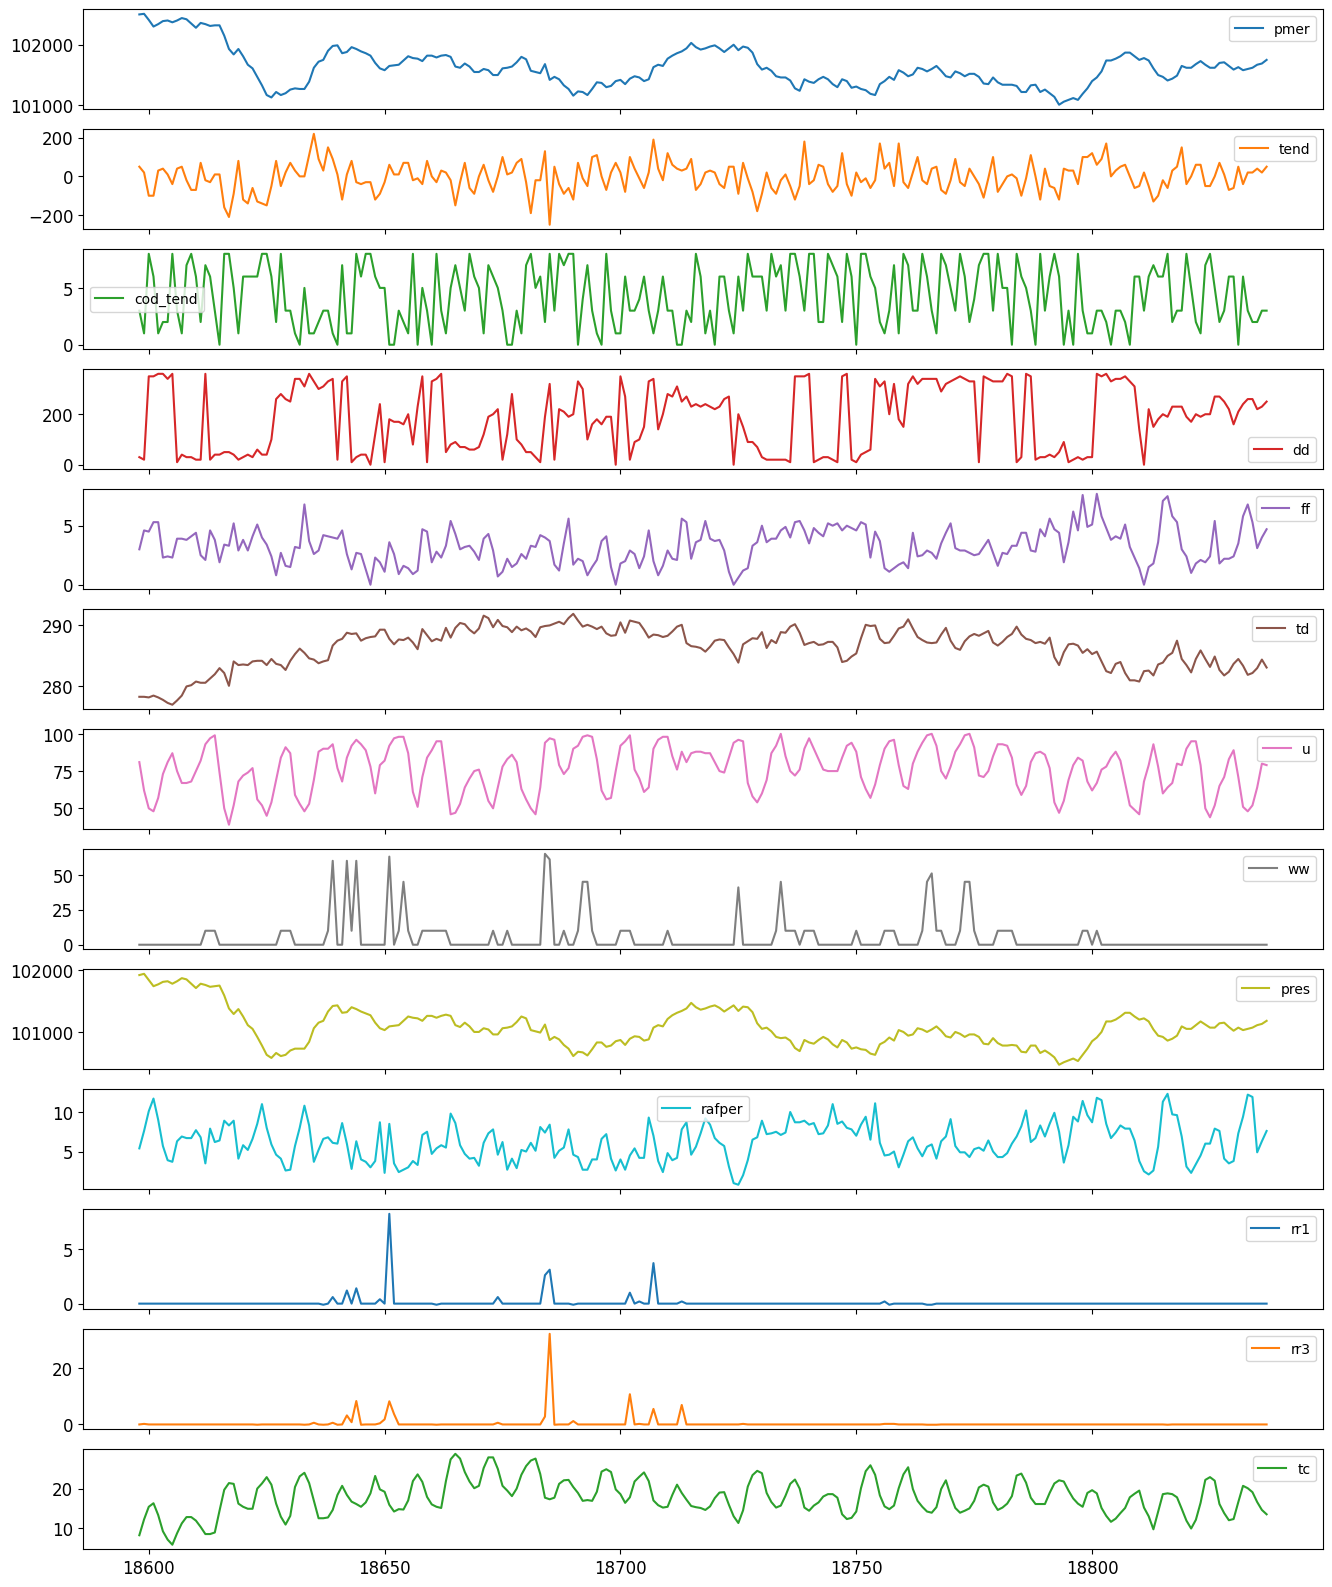

In [ ]:
window_size = 240
i=random.randint(0,len(df)-window_size)
df.iloc[i:i+window_size].plot(subplots=True, fontsize=12, figsize=(16,20))
plt.show()

In [ ]:
# nice_df = pd.read_csv('data/donnees-synop-essentielles-omm-NICE.csv', sep=";", parse_dates=True, index_col='Date')
# nice_df.sort_index(inplace=True)

# display(nice_df.head(10))

Export new dataset

In [ ]:
import os

In [ ]:
output_dir = "data"
new_dataset_filename = f'{output_dir}/cleaned-donnees-synop-essentielles-omm(LYS).csv'
new_descr_filename = f'{output_dir}/new-description-synop-essentielles-omm(LYS).json'

df.to_csv(new_dataset_filename, sep=';', index=False)
size = os.path.getsize(new_dataset_filename)/(1024*1024)

print(f'Dataset saved. ({size:0.1f} Mo)')

with open(new_descr_filename, 'w', encoding='utf-8') as f:
    json.dump(code2desc, f, indent=4)
print('Synop description saved.')


Dataset saved. (3.5 Mo)
Synop description saved.
